<a href="https://colab.research.google.com/github/kellykhy/DL2022-1/blob/main/0602_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자료 다운로드

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kellykimhuiyeong","key":"b1f5b9d19a72e8bb929f0aea546ccc4e"}'}

In [2]:
import os
os.listdir()

['.config', 'kaggle.json', 'sample_data']

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c unifesp-x-ray-body-part-classifier

100% 29.9G/29.9G [07:03<00:00, 79.5MB/s]
100% 29.9G/29.9G [07:03<00:00, 75.8MB/s]


In [ ]:
!unzip -qq unifesp-x-ray-body-part-classifier.zip

train/train/1025/1.2.826.0.1.3680043.8.498.11165434136293257355747581429615907664/1.2.826.0.1.3680043.8.498.65888772097966161701831827198617145798/1.2.826.0.1.3680043.8.498.33879919477556273662176300181972750947-c.dcm:  write error (disk full?).  Continue? (y/n/^C) 

In [ ]:
os.remove('unifesp-x-ray-body-part-classifier.zip')  # to secure the storage capacity

In [ ]:
os.listdir()

['.config',
 'train',
 'dicom_metadata_train.csv',
 'sample_submission.csv',
 'dicom_metadata_test.csv',
 'test',
 'train.csv',
 'kaggle.json',
 'sample_data']

# dcm 파일 활용하기

In [ ]:
!pip install pydicom
!pip install kornia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install fastai --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *

import pydicom, kornia, cv2

train_dcm_path = get_dicom_files("train")
test_dcm_path = get_dicom_files("test")

print("train len:", len(train_dcm_path), "\ntest len:", len(test_dcm_path))

train len: 1738 
test len: 743


In [ ]:
from google.colab import files
files.upload()

Saving dicom_metadata_train.csv to dicom_metadata_train.csv


{'dicom_metadata_train.csv': b'MultiImageType,ImageType,ImageType1,InstanceCreationDate,InstanceCreationTime,SOPClassUID,SOPInstanceUID,StudyDate,SeriesDate,ContentDate,StudyTime,ContentTime,AccessionNumber,Modality,Manufacturer,ReferringPhysicianName,CodeValue,StudyDescription,SeriesDescription,PatientName,PatientID,PatientBirthDate,PatientSex,PatientAge,PatientIdentityRemoved,BodyPartExamined,StudyInstanceUID,SeriesInstanceUID,StudyID,SeriesNumber,InstanceNumber,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,MultiPixelSpacing,PixelSpacing,PixelSpacing1,BitsAllocated,BitsStored,HighBit,PixelRepresentation,RescaleIntercept,RescaleSlope,RescaleType,PerformedProcedureStepStartTime,fname,img_min,img_max,img_mean,img_std,img_pct_window,SpecificCharacterSet,WindowCenter,WindowWidth,ImageType2,KVP,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,AcquisitionNumber,ImageType3\n1.0,ORIGINAL,PRIMARY,,,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.711579

In [ ]:
from google.colab import files
files.upload()

Saving dicom_metadata_test.csv to dicom_metadata_test.csv


{'dicom_metadata_test.csv': b'MultiImageType,ImageType,ImageType1,InstanceCreationDate,InstanceCreationTime,SOPClassUID,SOPInstanceUID,StudyDate,SeriesDate,ContentDate,StudyTime,ContentTime,AccessionNumber,Modality,Manufacturer,ReferringPhysicianName,CodeValue,StudyDescription,SeriesDescription,PatientName,PatientID,PatientBirthDate,PatientSex,PatientAge,PatientIdentityRemoved,BodyPartExamined,StudyInstanceUID,SeriesInstanceUID,StudyID,SeriesNumber,InstanceNumber,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,MultiPixelSpacing,PixelSpacing,PixelSpacing1,BitsAllocated,BitsStored,HighBit,PixelRepresentation,RescaleIntercept,RescaleSlope,RescaleType,PerformedProcedureStepStartTime,fname,img_min,img_max,img_mean,img_std,img_pct_window,WindowCenter,WindowWidth,SpecificCharacterSet,ImageType2,KVP,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,AcquisitionNumber\n1.0,ORIGINAL,PRIMARY,,,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.815251974383505217

In [ ]:
train_dcm2csv_df = pd.read_csv('dicom_metadata_train.csv')
train_dcm2csv_df

,MultiImageType,ImageType,ImageType1,InstanceCreationDate,InstanceCreationTime,SOPClassUID,SOPInstanceUID,StudyDate,SeriesDate,ContentDate,...,WindowCenter,WindowWidth,ImageType2,KVP,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,AcquisitionNumber,ImageType3
0,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.71157989004260882669063657298878631277,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.32467620439025796224161045738740609166,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.74856220852423198555486702707715689735,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.90865692473901867788171201500090752135,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.44687741644515558201307438644049640452,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.84195286770915865285283493888654502396,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1734,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.11211536623788107002735898165090841538,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1735,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.97523800054763336883452748817549462853,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1736,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.13690494879381638155074323667482680582,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_df = pd.read_csv('train.csv')
train_df

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258,0
1,1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125,15
2,1.2.826.0.1.3680043.8.498.10038426859954986240523417641213777162,12
3,1.2.826.0.1.3680043.8.498.10050991192143676483577217922037244257,14
4,1.2.826.0.1.3680043.8.498.10053309524595490852815579052225336016,3
...,...,...
1733,1.2.826.0.1.3680043.8.498.99711016467406172920578985719244800351,14
1734,1.2.826.0.1.3680043.8.498.99727280485333900933067489723088200708,11
1735,1.2.826.0.1.3680043.8.498.99935008698914755885142961280499046059,3
1736,1.2.826.0.1.3680043.8.498.99969671777553755311455387279891445345,2


In [ ]:
train_unq = train_df['Target'].unique()
print(train_unq)
print(" ")
print("The number of unique values =", len(train_unq))

['0 ' '15 ' '12 ' '14 ' '3 ' '13 20 ' '5 ' '17 ' '2 ' '6 ' '9 21 ' '9 '
 '16 ' '7 ' '11 ' '1 ' '20 ' '21 ' '13 ' '0 3 ' '8 ' '1 11 12 ' '0 15 '
 '19 ' '10 ' '4 ' '11 12 ' '1 6 ' '10 19 ' '5 8 ' '3 15 ' '7 9 ' '15 19 '
 '2 13 20 ' '18 ' '3 6 ' '2 20 ' '10 11 19 ' '1 12 ' '3 7 ' '8 16 ']
 
The number of unique values = 41


# multilabel classification으로 풀기

In [ ]:
train_df['Abdomen'] = 0
train_df['Ankle'] = 0
train_df['Cervical Spine'] = 0
train_df['Chest'] = 0
train_df['Clavicles'] = 0
train_df['Elbow'] = 0
train_df['Feet'] = 0
train_df['Finger'] = 0
train_df['Forearm'] = 0
train_df['Hand'] = 0
train_df['Hip'] = 0
train_df['Knee'] = 0
train_df['Lower Leg'] = 0
train_df['Lumbar Spine'] = 0
train_df['Others'] = 0
train_df['Pelvis'] = 0
train_df['Shoulder'] = 0
train_df['Sinus'] = 0
train_df['Skull'] = 0
train_df['Thigh'] = 0
train_df['Thoracic Spine'] = 0
train_df['Wrist'] = 0
train_df

,SOPInstanceUID,Target,Abdomen,Ankle,Cervical Spine,Chest,Clavicles,Elbow,Feet,Finger,...,Lower Leg,Lumbar Spine,Others,Pelvis,Shoulder,Sinus,Skull,Thigh,Thoracic Spine,Wrist
0,1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.10038426859954986240523417641213777162,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.2.826.0.1.3680043.8.498.10050991192143676483577217922037244257,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.10053309524595490852815579052225336016,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1.2.826.0.1.3680043.8.498.99711016467406172920578985719244800351,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1734,1.2.826.0.1.3680043.8.498.99727280485333900933067489723088200708,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1735,1.2.826.0.1.3680043.8.498.99935008698914755885142961280499046059,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1736,1.2.826.0.1.3680043.8.498.99969671777553755311455387279891445345,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
labels = ['Abdomen', 'Ankle', 'Cervical Spine', 'Chest', 'Clavicles', 'Elbow', 
          'Feet', 'Finger', 'Forearm', 'Hand', 'Hip', 'Knee', 'Lower Leg', 
          'Lumbar Spine', 'Others', 'Pelvis', 'Shoulder', 'Sinus', 'Skull', 
          'Thigh', 'Thoracic Spine', 'Wrist']

for i in range(len(train_df)):
    lbl_list = train_df.Target[i].split()
    
    for j in lbl_list:
        train_df.loc[i, labels[int(j)]] = 1

# df.loc["row", "column"]
# i는 train data 자체 인덱싱 (1~1738), j는 라벨 인덱싱

train_df

,SOPInstanceUID,Target,Abdomen,Ankle,Cervical Spine,Chest,Clavicles,Elbow,Feet,Finger,...,Lower Leg,Lumbar Spine,Others,Pelvis,Shoulder,Sinus,Skull,Thigh,Thoracic Spine,Wrist
0,1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125,15,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.10038426859954986240523417641213777162,12,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.2.826.0.1.3680043.8.498.10050991192143676483577217922037244257,14,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.10053309524595490852815579052225336016,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1.2.826.0.1.3680043.8.498.99711016467406172920578985719244800351,14,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1734,1.2.826.0.1.3680043.8.498.99727280485333900933067489723088200708,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1735,1.2.826.0.1.3680043.8.498.99935008698914755885142961280499046059,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1736,1.2.826.0.1.3680043.8.498.99969671777553755311455387279891445345,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_merged_df = pd.merge(train_dcm2csv_df, train_df, on='SOPInstanceUID')
train_merged_df

,MultiImageType,ImageType,ImageType1,InstanceCreationDate,InstanceCreationTime,SOPClassUID,SOPInstanceUID,StudyDate,SeriesDate,ContentDate,...,Lower Leg,Lumbar Spine,Others,Pelvis,Shoulder,Sinus,Skull,Thigh,Thoracic Spine,Wrist
0,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.71157989004260882669063657298878631277,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.32467620439025796224161045738740609166,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.74856220852423198555486702707715689735,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.90865692473901867788171201500090752135,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.44687741644515558201307438644049640452,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.84195286770915865285283493888654502396,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1734,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.11211536623788107002735898165090841538,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1735,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.97523800054763336883452748817549462853,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1736,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.13690494879381638155074323667482680582,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
train_merged_df.to_csv('train_merged_df.csv', index = False)

# DICOM 이미지를 jpg 이미지로 변환하는 방법

/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:239: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({bits_stored}-bit) "


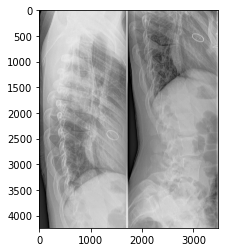

In [ ]:
#이건 그냥 예시로

tmp = train_dcm_path[np.random.randint(0, 1737)].dcmread()
dcm_img = tmp.pixel_array.astype(float)
img = np.uint8((np.maximum(dcm_img,0)/dcm_img.max())*255)
plt.imshow(img, cmap='gray_r')

In [ ]:
import cv2
from matplotlib import pyplot as plt

X = []
y = []
for i in range(len(train_dcm_path)):
    tmp = train_dcm_path[i].dcmread()
    
    dcm_img = tmp.pixel_array.astype(float)
    rescaled_img = np.uint8((np.maximum(dcm_img,0)/dcm_img.max())*255)
    img = cv2.resize(rescaled_img, dsize=(256,256), interpolation=cv2.INTER_AREA)/255
    X.append(np.expand_dims(img, axis=-1))
    
    uid = str(tmp['SOPInstanceUID'].value)
    y.append(np.ndarray.flatten(np.array(train_merged_df.loc[train_merged_df['SOPInstanceUID'] == uid][train_merged_df.columns[64:]])))
    
X = np.array(X)
y = np.array(y)

/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:239: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({bits_stored}-bit) "
/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:239: UserWarning: The (0028,0101) 'Bits Stored' value (10-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({bits_stored}-bit) "
/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:239: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({bits_stored}-bit) "


In [ ]:
np.save('X_save', X)

In [ ]:
np.save('y_save', y)

label이 3개인 데이터 10개


In [ ]:
a = 0
for i in range(len(y)):
    if (np.sum(y[i]) == 3):
        a += 1
print(a)

10


label이 2개인 데이터 122개

In [ ]:
a = 0
for i in range(len(y)):
    if (np.sum(y[i]) == 2):
        a += 1
print(a)

122


seperate X, y into train_set and validation set

In [ ]:
num_val_samples = 700
train_input_imgs = X[:-num_val_samples]
train_targets = y[:-num_val_samples]
val_input_imgs = X[-num_val_samples:]
val_targets = y[-num_val_samples:]

In [ ]:
train_input_imgs.shape

(1038, 256, 256, 1)

In [ ]:
val_input_imgs.shape

(700, 256, 256, 1)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
   inputs = keras.Input(shape=(256,256,1))
   x = layers.Rescaling(1./255)(inputs)
   x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
   x = layers.MaxPooling2D(pool_size=2)(x)
   x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
   x = layers.MaxPooling2D(pool_size=2)(x)
   x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
   x = layers.MaxPooling2D(pool_size=2)(x)
   x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
   x = layers.Flatten()(x)
   outputs = layers.Dense(22, activation="sigmoid")(x)
   model = keras.Model(inputs=inputs, outputs=outputs)

   return model

model = get_model()
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_17 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 60, 60, 128)       7385

In [ ]:
model.compile(optimizer="adam", 
              loss="binary_crossentropy", 
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="best",
        save_best_only=True,
        monitor="val_loss")
]

In [ ]:
history = model.fit(
    train_input_imgs,
    train_targets,
    epochs=30,
    validation_data=(val_input_imgs,val_targets))

Epoch 1/30
33/33 [==============================] - 173s 5s/step - loss: 0.1968 - accuracy: 0.3979 - val_loss: 0.1536 - val_accuracy: 0.4786
Epoch 2/30
33/33 [==============================] - 169s 5s/step - loss: 0.1567 - accuracy: 0.4191 - val_loss: 0.1452 - val_accuracy: 0.4786
Epoch 3/30
33/33 [==============================] - 171s 5s/step - loss: 0.1491 - accuracy: 0.4210 - val_loss: 0.1366 - val_accuracy: 0.4800
Epoch 4/30
33/33 [==============================] - 168s 5s/step - loss: 0.1296 - accuracy: 0.4461 - val_loss: 0.1128 - val_accuracy: 0.5243
Epoch 5/30
33/33 [==============================] - 172s 5s/step - loss: 0.1127 - accuracy: 0.5279 - val_loss: 0.0993 - val_accuracy: 0.5500
Epoch 6/30
33/33 [==============================] - 169s 5s/step - loss: 0.0996 - accuracy: 0.5992 - val_loss: 0.0923 - val_accuracy: 0.6186
Epoch 7/30
33/33 [==============================] - 168s 5s/step - loss: 0.0917 - accuracy: 0.6416 - val_loss: 0.0925 - val_accuracy: 0.6671
Epoch 8/30
33

VGG

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)